In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **DATA CARD**
**relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price**.

**In this problem you do not have to predict actual price but a price range indicating how high the price is**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [5]:
df_test=pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


#  NOTE!!  THER İS  X_TEST_CSV   BUT  NOT  Y_TEST İS GİVEN!!  SO TRAİN DATA İS SPLİT TO TEST_AND_TRAİN !!

In [6]:
df=pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df2=pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [8]:
df=pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
for col in df.columns:
    if df[col].dtype==np.int64:
        df[col]=df[col].astype('int16')
        

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int16  
 1   blue           2000 non-null   int16  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int16  
 4   fc             2000 non-null   int16  
 5   four_g         2000 non-null   int16  
 6   int_memory     2000 non-null   int16  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int16  
 9   n_cores        2000 non-null   int16  
 10  pc             2000 non-null   int16  
 11  px_height      2000 non-null   int16  
 12  px_width       2000 non-null   int16  
 13  ram            2000 non-null   int16  
 14  sc_h           2000 non-null   int16  
 15  sc_w           2000 non-null   int16  
 16  talk_time      2000 non-null   int16  
 17  three_g        2000 non-null   int16  
 18  touch_sc

In [14]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [16]:
a=df['battery_power'].dtype
a

dtype('int16')

In [18]:
#cols=df.columns
#for col in cols:
    #(df
    #.assign(col=df[col].astype([lambda x: df['x'].astype('int16') if  df['x'].dtype==dtype('int64') else df['x'].dtype==dtype('int64')])
    #)
   # )

In [19]:

import matplotlib.pyplot as plt


In [20]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


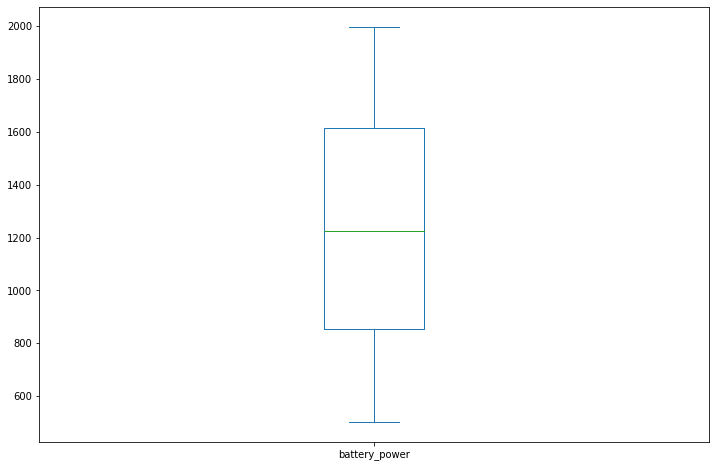

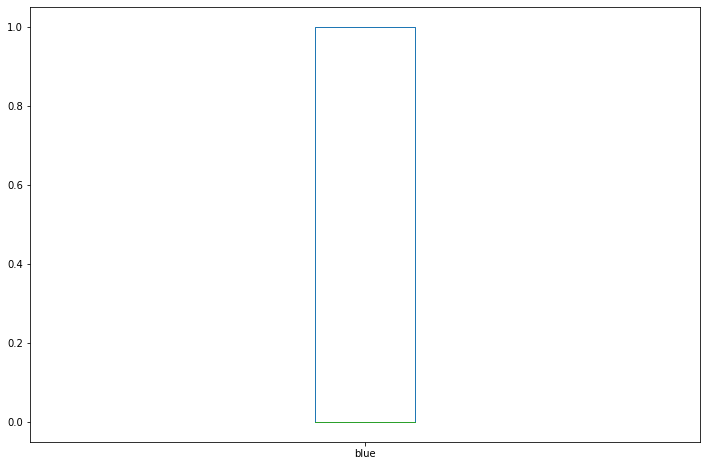

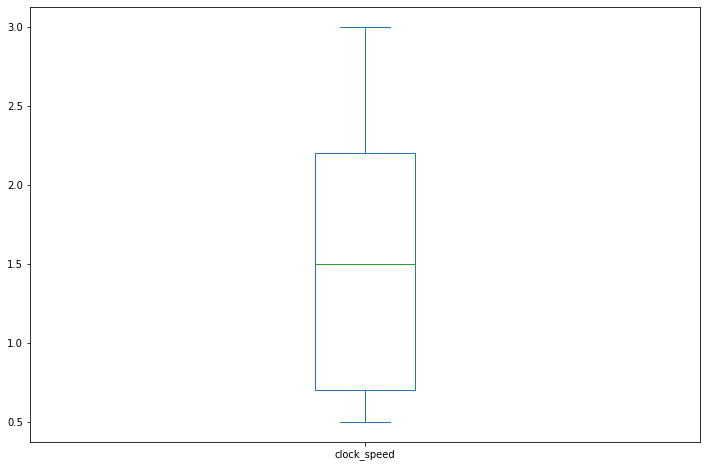

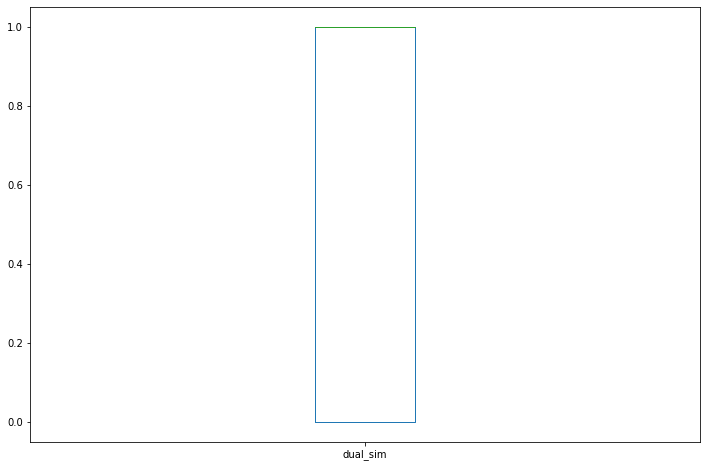

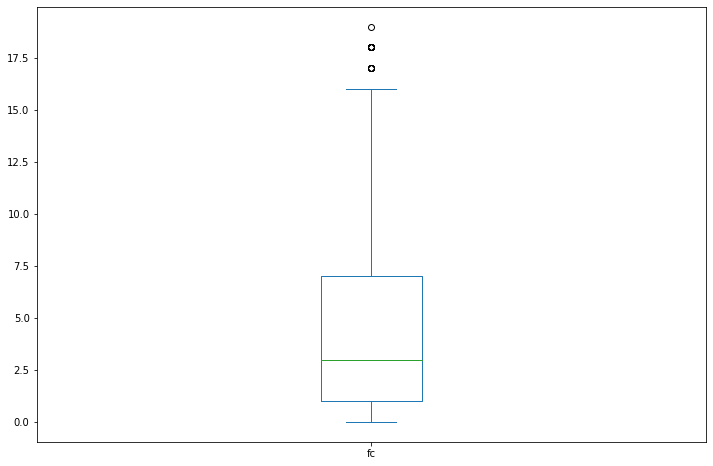

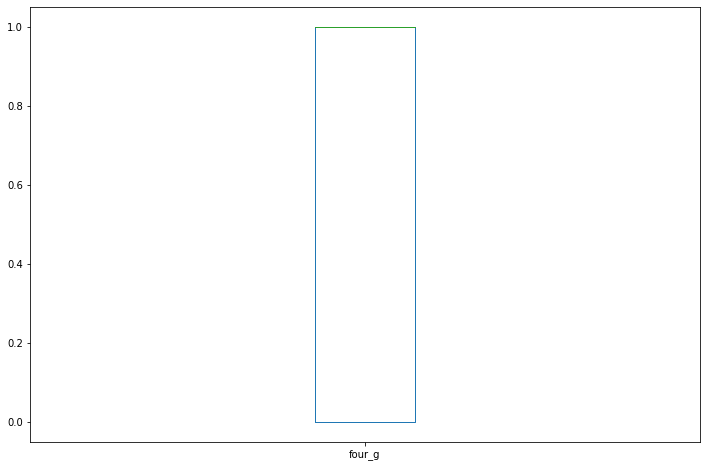

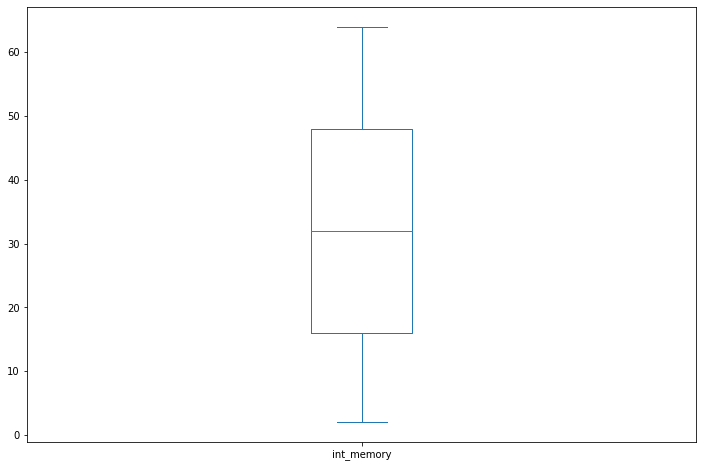

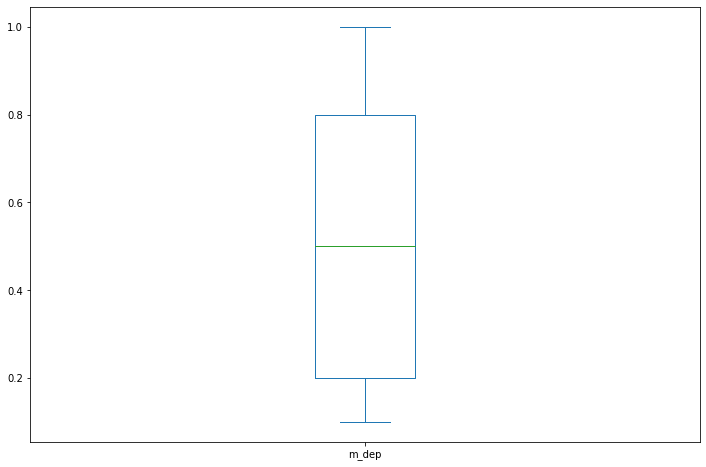

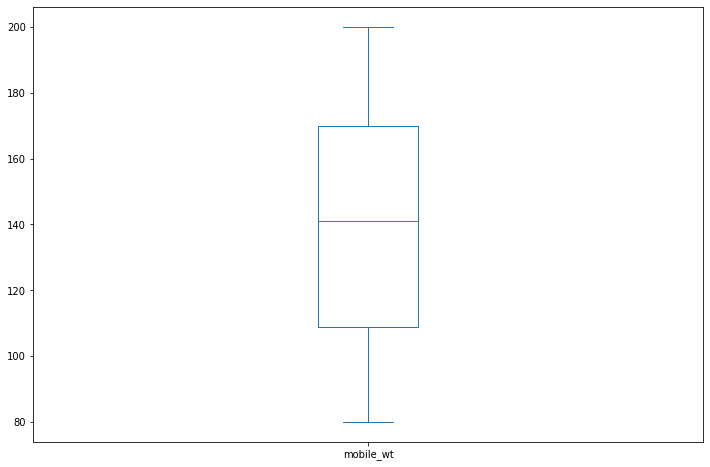

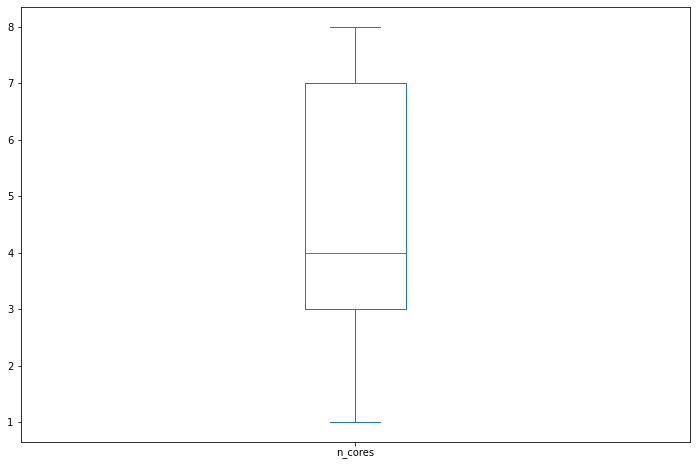

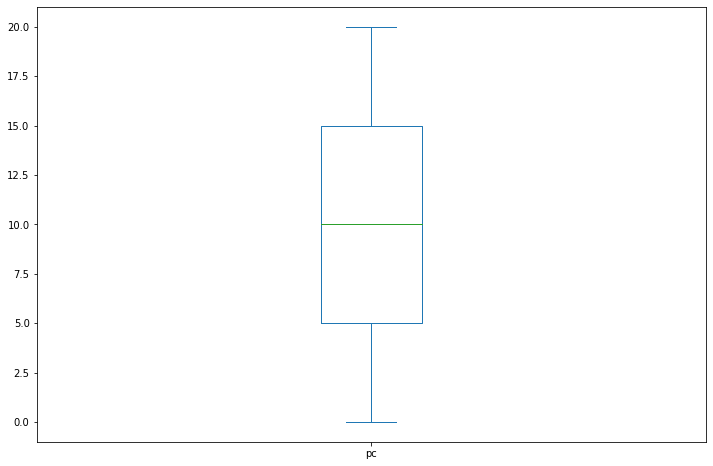

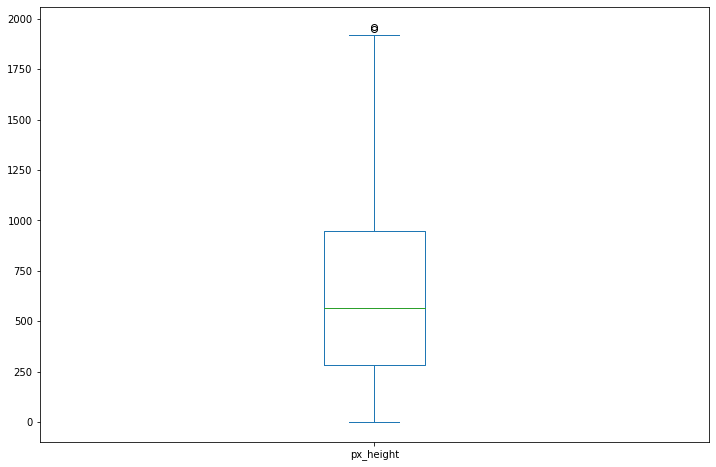

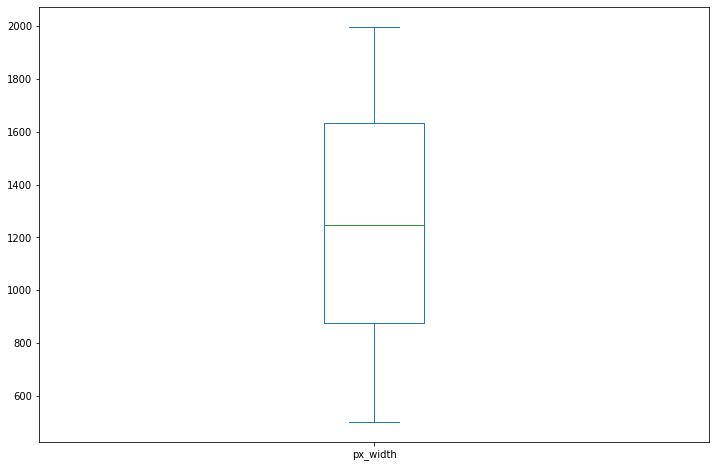

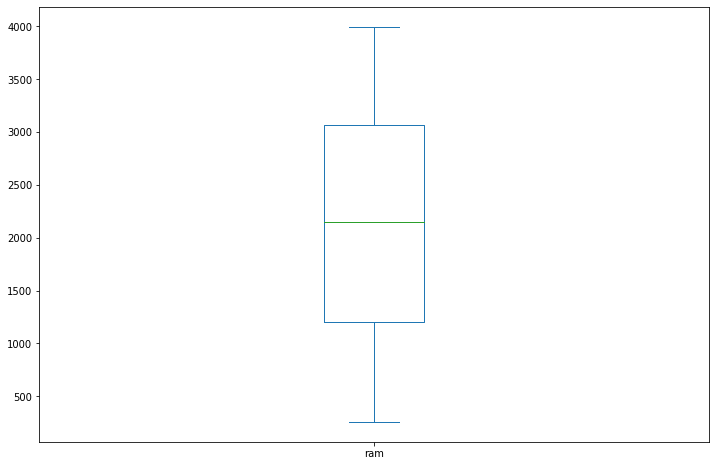

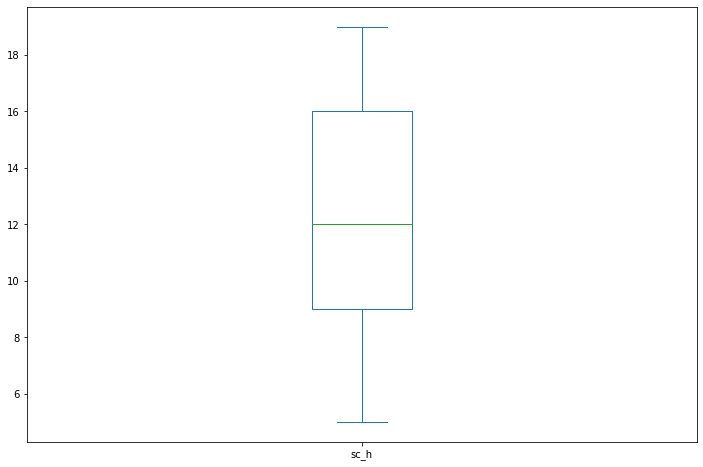

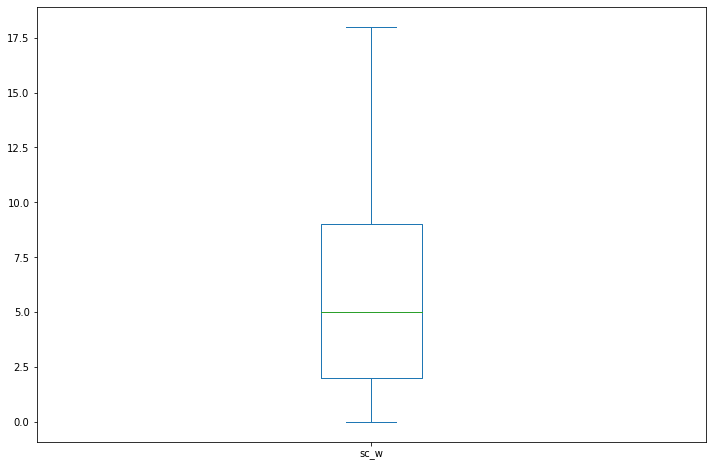

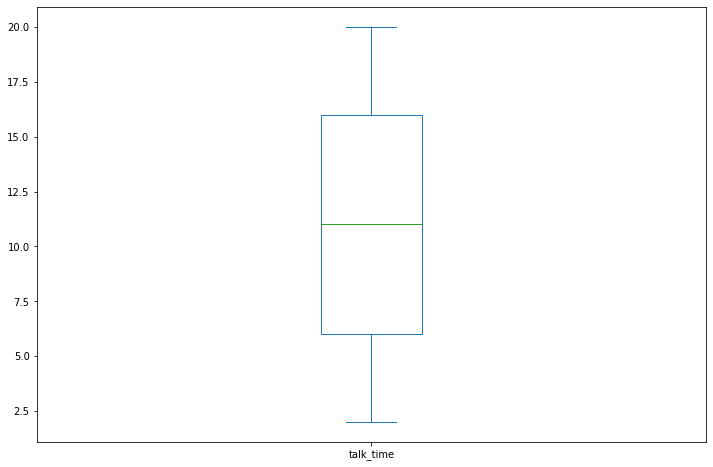

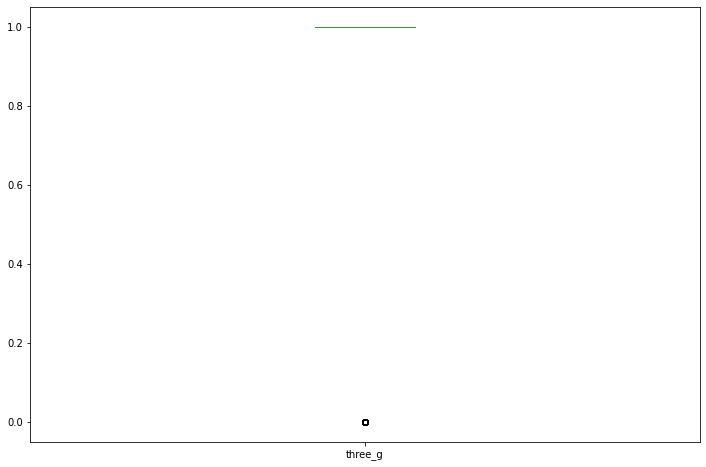

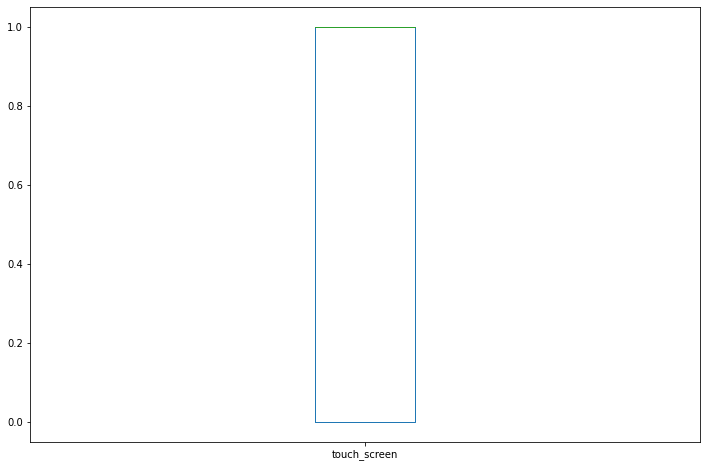

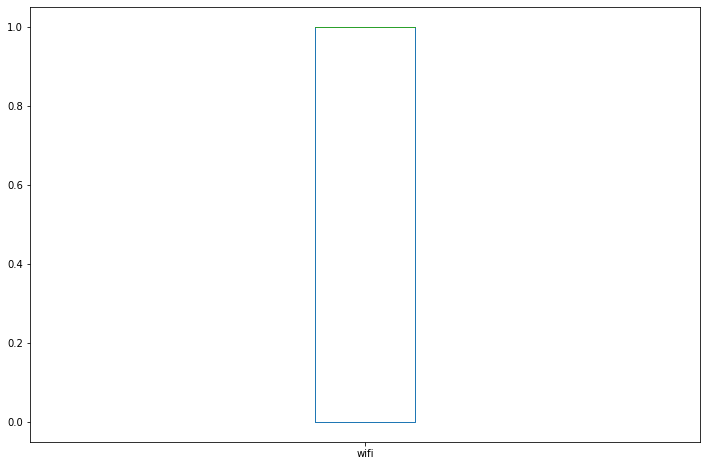

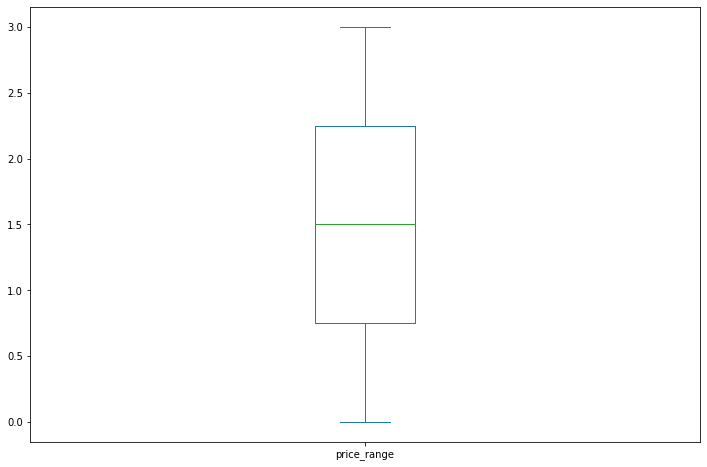

In [21]:
cols=df.columns
for i in cols:
    plt.figure(figsize=(12,8))
    df[i].plot.box()
    
   ###  Grapfhs shows that there are not significant outliers  in this data

In [22]:
df.three_g.isna().any()

False

In [23]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [24]:
df.describe().T
#  there are big differances between columns so normalization and scaling the columns  should be done !!!

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>],
       [<AxesSubplot:title={'center':'four_g'}>,
        <AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>],
       [<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>,
        <AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>,
        <AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}>],

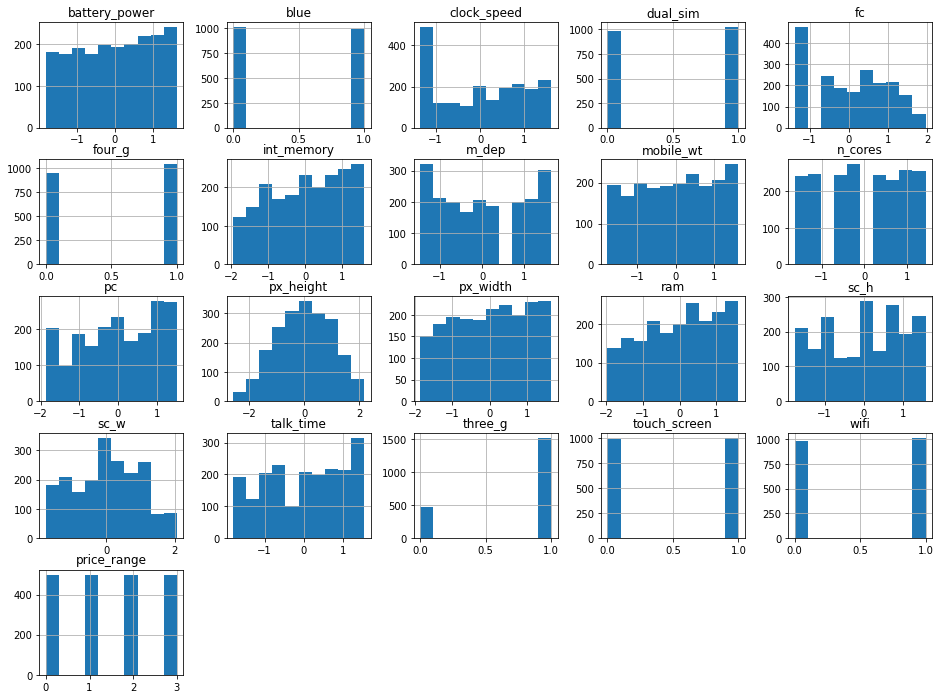

In [36]:
df.hist(figsize=(16,12))

<AxesSubplot:>

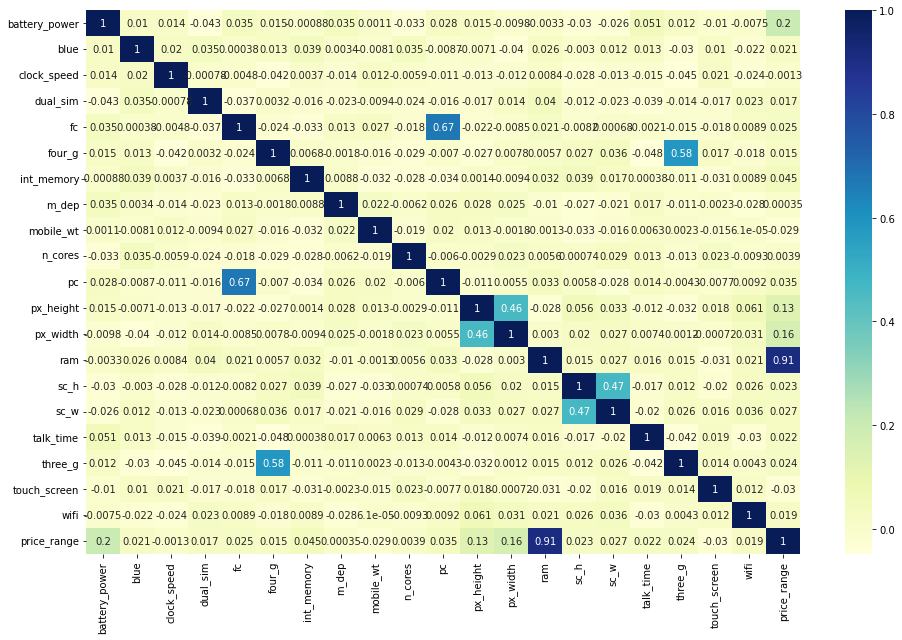

In [38]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(),cmap="YlGnBu", annot = True)

##  ------------------- **CORRELATİONS** ---------------------
###  there are high positive correlatins between :

###  ** ram and price_range      --->>   % 91
###  ** pc  and fc               --->>    % 67

###   ** four_g and three_g       --->>   % 58
###   ** px_height and px_weight  -->>    % 46
###  ** sc_height and sc_weight  -->>    % 47

In [39]:
y=df.price_range.copy()
X=df.drop(columns='price_range').copy()
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.882102,0,0.864859,0,-0.678681,0,-1.478784,0.390185,1.320391,-1.103136,-1.351153,-2.133710,-1.156055,0.444771,-0.777037,0.464020,1.387539,0,0,1
1,-0.443319,1,-1.349676,1,-1.378945,1,1.109283,0.715954,-0.084928,-0.618098,-0.561397,0.699735,1.620649,0.513836,1.108859,-0.486762,-0.685321,1,1,0
2,-1.631335,1,-1.349676,1,-0.249635,1,0.550845,1.334562,0.167480,0.263015,-0.561397,1.273195,1.062404,0.490319,-0.296962,-0.812923,-0.299422,1,1,0
3,-1.484093,1,1.157974,0,-1.378945,0,-1.243379,1.030416,-0.227098,0.672306,-0.055479,1.203384,1.208232,0.628775,0.877539,0.652224,0.065688,1,0,0
4,1.281431,1,-0.286815,0,1.521207,1,0.694804,0.390185,0.055837,-1.103136,0.701389,1.191358,-0.041729,-0.590591,-1.019867,-0.812923,0.749580,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.004622,1,-1.349676,1,-1.378945,1,-1.953278,1.030416,-0.961626,0.672306,0.701389,1.212375,1.422063,-1.396857,0.176768,-0.207794,1.387539,1,1,0
1996,1.563423,1,1.251593,1,-1.378945,0,0.453030,-1.052426,1.294452,-0.165428,-1.134810,0.717261,1.574285,-0.005649,-0.296962,0.993119,0.912820,1,1,1
1997,1.458467,0,-0.706681,1,-0.678681,1,0.303293,0.715954,-0.901262,1.446227,-1.134810,0.633973,0.885258,0.863817,-0.777037,-1.215608,-1.099005,1,1,0
1998,0.651149,0,-0.706681,0,0.312247,1,0.789059,-1.457049,0.167480,0.263015,-0.742985,-0.563247,-1.384740,-1.161835,1.339161,0.993119,1.387539,1,1,1


In [40]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int16

In [29]:
scale_list=['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
df1=df[scale_list].copy()


In [30]:
df[scale_list]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [41]:
from sklearn import preprocessing
transform_power = preprocessing.PowerTransformer()
scaled_df = transform_power.fit_transform(df1)
df_sc = pd.DataFrame(scaled_df)

In [42]:
df[scale_list]=df_sc.copy()
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.882102,0,0.864859,0,-0.678681,0,-1.478784,0.390185,1.320391,-1.103136,...,-2.133710,-1.156055,0.444771,-0.777037,0.464020,1.387539,0,0,1,1
1,-0.443319,1,-1.349676,1,-1.378945,1,1.109283,0.715954,-0.084928,-0.618098,...,0.699735,1.620649,0.513836,1.108859,-0.486762,-0.685321,1,1,0,2
2,-1.631335,1,-1.349676,1,-0.249635,1,0.550845,1.334562,0.167480,0.263015,...,1.273195,1.062404,0.490319,-0.296962,-0.812923,-0.299422,1,1,0,2
3,-1.484093,1,1.157974,0,-1.378945,0,-1.243379,1.030416,-0.227098,0.672306,...,1.203384,1.208232,0.628775,0.877539,0.652224,0.065688,1,0,0,2
4,1.281431,1,-0.286815,0,1.521207,1,0.694804,0.390185,0.055837,-1.103136,...,1.191358,-0.041729,-0.590591,-1.019867,-0.812923,0.749580,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.004622,1,-1.349676,1,-1.378945,1,-1.953278,1.030416,-0.961626,0.672306,...,1.212375,1.422063,-1.396857,0.176768,-0.207794,1.387539,1,1,0,0
1996,1.563423,1,1.251593,1,-1.378945,0,0.453030,-1.052426,1.294452,-0.165428,...,0.717261,1.574285,-0.005649,-0.296962,0.993119,0.912820,1,1,1,2
1997,1.458467,0,-0.706681,1,-0.678681,1,0.303293,0.715954,-0.901262,1.446227,...,0.633973,0.885258,0.863817,-0.777037,-1.215608,-1.099005,1,1,0,3
1998,0.651149,0,-0.706681,0,0.312247,1,0.789059,-1.457049,0.167480,0.263015,...,-0.563247,-1.384740,-1.161835,1.339161,0.993119,1.387539,1,1,1,0


In [43]:
X[scale_list]=df_sc.copy()
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.882102,0,0.864859,0,-0.678681,0,-1.478784,0.390185,1.320391,-1.103136,-1.351153,-2.133710,-1.156055,0.444771,-0.777037,0.464020,1.387539,0,0,1
1,-0.443319,1,-1.349676,1,-1.378945,1,1.109283,0.715954,-0.084928,-0.618098,-0.561397,0.699735,1.620649,0.513836,1.108859,-0.486762,-0.685321,1,1,0
2,-1.631335,1,-1.349676,1,-0.249635,1,0.550845,1.334562,0.167480,0.263015,-0.561397,1.273195,1.062404,0.490319,-0.296962,-0.812923,-0.299422,1,1,0
3,-1.484093,1,1.157974,0,-1.378945,0,-1.243379,1.030416,-0.227098,0.672306,-0.055479,1.203384,1.208232,0.628775,0.877539,0.652224,0.065688,1,0,0
4,1.281431,1,-0.286815,0,1.521207,1,0.694804,0.390185,0.055837,-1.103136,0.701389,1.191358,-0.041729,-0.590591,-1.019867,-0.812923,0.749580,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.004622,1,-1.349676,1,-1.378945,1,-1.953278,1.030416,-0.961626,0.672306,0.701389,1.212375,1.422063,-1.396857,0.176768,-0.207794,1.387539,1,1,0
1996,1.563423,1,1.251593,1,-1.378945,0,0.453030,-1.052426,1.294452,-0.165428,-1.134810,0.717261,1.574285,-0.005649,-0.296962,0.993119,0.912820,1,1,1
1997,1.458467,0,-0.706681,1,-0.678681,1,0.303293,0.715954,-0.901262,1.446227,-1.134810,0.633973,0.885258,0.863817,-0.777037,-1.215608,-1.099005,1,1,0
1998,0.651149,0,-0.706681,0,0.312247,1,0.789059,-1.457049,0.167480,0.263015,-0.742985,-0.563247,-1.384740,-1.161835,1.339161,0.993119,1.387539,1,1,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   int16  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int16  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int16  
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   int16  
 18  touch_sc

In [45]:
cols=df.columns
(df
 [cols]
 #.assign()
 .astype({'blue': 'int8', 'fc': 'int8', 'four_g': 'int8', 'three_g': 'int8',
          'touch_screen': 'int8', 'wifi': 'int8', })
 #.describe()
 #.info()
 .to_json('mobilee.json')
 #.info()
)

In [46]:
cols=df.columns
df[cols].astype({'blue': 'int8', 'fc': 'int8', 'four_g': 'int8', 'three_g': 'int8',
          'touch_screen': 'int8', 'wifi': 'int8'}).info()

 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   int8   
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int16  
 4   fc             2000 non-null   int8   
 5   four_g         2000 non-null   int8   
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   int8   
 18  touch_sc

In [47]:
X.astype({'blue': 'int8', 'fc': 'int8', 'four_g': 'int8', 'three_g': 'int8',
          'touch_screen': 'int8', 'wifi': 'int8'})
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   int16  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int16  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int16  
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   int16  
 18  touch_sc

In [ ]:
#y_test=df_test['price_range'].copy()
#X_test=df_test.drop(columns='price_range').copy()
#X_test.describe()

In [48]:
y=df.price_range.copy()
X=df.drop(columns='price_range').copy()
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.882102,0,0.864859,0,-0.678681,0,-1.478784,0.390185,1.320391,-1.103136,-1.351153,-2.133710,-1.156055,0.444771,-0.777037,0.464020,1.387539,0,0,1
1,-0.443319,1,-1.349676,1,-1.378945,1,1.109283,0.715954,-0.084928,-0.618098,-0.561397,0.699735,1.620649,0.513836,1.108859,-0.486762,-0.685321,1,1,0
2,-1.631335,1,-1.349676,1,-0.249635,1,0.550845,1.334562,0.167480,0.263015,-0.561397,1.273195,1.062404,0.490319,-0.296962,-0.812923,-0.299422,1,1,0
3,-1.484093,1,1.157974,0,-1.378945,0,-1.243379,1.030416,-0.227098,0.672306,-0.055479,1.203384,1.208232,0.628775,0.877539,0.652224,0.065688,1,0,0
4,1.281431,1,-0.286815,0,1.521207,1,0.694804,0.390185,0.055837,-1.103136,0.701389,1.191358,-0.041729,-0.590591,-1.019867,-0.812923,0.749580,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.004622,1,-1.349676,1,-1.378945,1,-1.953278,1.030416,-0.961626,0.672306,0.701389,1.212375,1.422063,-1.396857,0.176768,-0.207794,1.387539,1,1,0
1996,1.563423,1,1.251593,1,-1.378945,0,0.453030,-1.052426,1.294452,-0.165428,-1.134810,0.717261,1.574285,-0.005649,-0.296962,0.993119,0.912820,1,1,1
1997,1.458467,0,-0.706681,1,-0.678681,1,0.303293,0.715954,-0.901262,1.446227,-1.134810,0.633973,0.885258,0.863817,-0.777037,-1.215608,-1.099005,1,1,0
1998,0.651149,0,-0.706681,0,0.312247,1,0.789059,-1.457049,0.167480,0.263015,-0.742985,-0.563247,-1.384740,-1.161835,1.339161,0.993119,1.387539,1,1,1


In [52]:
## THERE IS ORDİNAL CategoricalDtype  FOR TARGET COLUMN  y  so ordinal transformation is done. !!

from pandas.api.types import CategoricalDtype

cat_dtype = CategoricalDtype(

    categories=[0,1,2,3], ordered=True) ##  3 is exprensive mobile phone but 0 is cheap

#yy=y.copy()
y.astype(cat_dtype)


0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [53]:
# STRATIFY  =  y   TARGET COLUMN  IS UNBALANCED
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_test.shape

(400, 20)

#  **CREATE  MODELS**

In [55]:
from sklearn import metrics as metrics
from sklearn.metrics import make_scorer,f1_score, recall_score,accuracy_score ,precision_score
scorers = {
            'f1_score': make_scorer(f1_score, average='micro'),
            'precision_score': make_scorer(precision_score, average='micro'),
            'recall_score': make_scorer(recall_score, average='micro'),
            'accuracy_score': make_scorer(accuracy_score)
          }

## 1-  **trying  RandomForestClassifier**

In [56]:
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=23, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print('RandomForestClassifier precision_score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('recall scoree : {0:0.2f}'.format(recall_score(y_test, y_pred,average= 'micro')))


RandomForestClassifier precision_score: 0.89
recall scoree : 0.89


## 2-  **trying  LogisticRegression**

In [57]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)   
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.recall_score(y_test, y_pred,average= 'micro'))

0.945


## 3-  **trying  KNeighborsClassifier**

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred,average= 'micro'))

0.5875
0.5875


## 4-  **trying  DecisionTreeClassifier**

In [59]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)


#Predict the response for test dataset
y_pred_tree = model.predict(X_test)

# scores
print('precision_score: {0:0.3f}'.format(metrics.precision_score(y_test, y_pred_tree,average= 'micro')))
print('recall scoree : {0:0.3f}'.format(metrics.recall_score(y_test, y_pred_tree,average= 'micro')))
print('DecisionTreeClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_tree)))


precision_score: 0.843
recall scoree : 0.843
DecisionTreeClassifier Model accuracy score: 0.8425


## 5-  **trying  Support Vector Machine Classifier (SVM )**

In [ ]:
from sklearn.svm import SVC

svm=SVC(random_state=1)
svm.fit(X_train,y_train)

SVC(random_state=1)

print("print svm accuracy:", svm.score(X_test,y_test))

 ## 6-  **lightgbm Classifier**  via Optuna Hyper Parameter Tuning

In [63]:
import optuna  # pip install optuna
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score, precision_recall_curve

from sklearn.model_selection import StratifiedKFold
import lightgbm as lgbm

def objective(trial, X, y):
    param_grid = {}  # to be filled in later
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgbm.LGBMClassifier(objective="multiclass", **param_grid, num_classes = 4)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric='multi_logloss',
            early_stopping_rounds=100,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = preds

    return np.mean(cv_scores)

In [64]:
def objective(trial, X, y):
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1, step=0.05),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 6, 23),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 10000, step=50),
        "max_bin": trial.suggest_int("max_bin", 200, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

In [65]:
from optuna.integration import LightGBMPruningCallback
from sklearn.model_selection import StratifiedKFold
def objective(trial, X, y):
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1, step=0.05),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 6, 23),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 10000, step=50),
        "max_bin": trial.suggest_int("max_bin", 200, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgbm.LGBMClassifier(objective="multiclass", **param_grid, num_classes = 4,)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric='multi_logloss',
            early_stopping_rounds=10,
              # Add a pruning callback  num_classes = INSERT NUMBER OF TARGET CLASSES HERE,
        )
        preds = model.predict(X_test)
        cv_scores[idx] = metrics.f1_score(y_test, preds, average='micro')
        
        #cv_scores[idx] = metrics.recall_score(y_test, preds)
        #acc = metrics.accuracy_score(preds, y_test)
        ##recall = metrics.recall_score(preds, y_test)
        #precision = metrics.precision_score(preds, y_test)
        #f1 = metrics.f1_score(preds, y_test)

   
    return np.mean(cv_scores) #,acc, f1, recall, precision

In [ ]:
%%capture output
study = optuna.create_study(direction="maximize", study_name="LGBdM Classifier")
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=1000)

In [68]:
best_parameters4_light= {'n_estimators': 10000, 'learning_rate': 0.96, 'num_leaves': 2960, 'max_depth': 16, 'min_data_in_leaf': 100, 'max_bin': 232, 'lambda_l1': 0, 
              'lambda_l2': 35, 'min_gain_to_split': 0.5184814518771126, 'bagging_fraction': 0.5, 'bagging_freq': 1,
              'feature_fraction': 0.6000000000000001}

In [71]:
model4 = lgbm.LGBMClassifier(objective="multiclass", **best_parameters4_light, num_classes = 4)
model4.fit(X_train,y_train)
y_pred_lgbt=model4.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_lgbt))
print(metrics.precision_score(y_test, y_pred_lgbt,average= 'micro'))
print(metrics.recall_score(y_test, y_pred_lgbt,average= 'micro'))

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=0.5184814518771126, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5184814518771126
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
0.9
0.9
0.9


##  7-  **trying  XGBClassifier** via Hyper Parameter Tuning

In [72]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))



  

In [73]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=skf.split(X,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
#timer(start_time) # timing ends here for "start_time" variabl

print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)



Fitting 3 folds for each of 5 candidates, totalling 15 fits
[23:56:09] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 All results:
{'mean_fit_time': array([6.97875619, 9.07720335, 8.68245578, 8.0655001 , 7.76409904]), 'std_fit_time': array([0.06226639, 0.04809984, 0.2194352 , 0.15528554, 0.41326591]), 'mean_score_time': array([0.02326663, 0.04564611, 0.0518314 , 0.0299476 , 0.03255669]), 'std_score_time': array([0.00042123, 0.00120294, 0.00120742, 0.00144269, 0.00120718]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5

In [74]:
from sklearn import metrics
xgb2=XGBClassifier(subsample= 0.8, min_child_weight=1, max_depth= 4, gamma=1, colsample_bytree= 1.0)
modell=xgb2.fit(X_train, y_train)
y_pred=modell.predict(X_test)
#print(metrics.recall_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
#print(metrics.accuracy(y_test, y_pred))

0.945


#  ----------------------------    Final  Results ---------------------
#  BOTH  LOGİSTİC REGRESSİON  AND  XGBClassifier  CAN BE  USED  VİA 0.945 ACCURACY  SCORE !!!